### Importing Libraries

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import numpy as np
import matplotlib.pyplot as plt

from torch.utils.data import Dataset, DataLoader

import torchvision.transforms as transforms
import torchvision.transforms.functional as TF

import torch.optim as optim

import os

from PIL import Image, ImageOps

import random

#import any other library you need below this line

### Loading data

Upload the data in zip format to Colab. Then run the cell below.

In [2]:
# !unzip data.zip
# Aready done.

### Defining the Dataset Class

In [5]:
class Cell_data(Dataset):
  def __init__(self, data_dir, size, train = 'True', train_test_split = 0.8, augment_data = True):
    ##########################inputs##################################
    #data_dir(string) - directory of the data#########################
    #size(int) - size of the images you want to use###################
    #train(boolean) - train data or test data#########################
    #train_test_split(float) - the portion of the data for training###
    #augment_data(boolean) - use data augmentation or not#############
    
    super(Cell_data, self).__init__()
    self.data_dir = data_dir
    self.image_root_path = os.path.join(self.data_dir, "scans")
    self.label_root_path = os.path.join(self.data_dir, "labels")
    self.image_file_names = os.listdir(self.image_root_path)
    self.label_file_names = os.listdir(self.label_root_path)
    
    self.images_path = [os.path.join(self.image_root_path, img) for img in self.image_file_names]
    self.lebels_path = [os.path.join(self.label_root_path, label) for label in self.label_file_names]

    self.size = size
    self.train = train

    split = int(len(self.image_file_names) * train_test_split)
    if self.train:
      self.images_path = self.images_path[:split]
      self.lebels_path = self.lebels_path[:split]
    else:
      self.images_path = self.images_path[split:]
      self.lebels_path = self.lebels_path[split:]
    
    self.train_test_split = train_test_split
    self.augment_data = augment_data

    self.zoom_factor_lower_bound = 0.60
    self.zoom_factor_upper_bound = 0.80
    assert(self.zoom_factor_upper_bound > self.zoom_factor_lower_bound)
    assert(self.zoom_factor_lower_bound > 0 and self.zoom_factor_lower_bound < 1)
    assert(self.zoom_factor_upper_bound > 0 and self.zoom_factor_upper_bound < 1)

    self.rotate_angle_lower_bound = -45
    self.rotate_angle_upper_bound = 45
    
    self.transform = transforms.Compose([
                          transforms.ToTensor(),
                          transforms.Resize((int(self.size), int(self.size)))
                          ])


  def __getitem__(self, idx):
      
      image = self.transform(Image.open(self.images_path[idx]))
      label = self.transform(Image.open(self.lebels_path[idx]))
      
      if debug_1:
          print(image.shape)
          print(label.shape)
          plt.imshow(image[0])
          plt.show()
          plt.imshow(label[0])
          plt.show()
      
      #data augmentation part
      if self.augment_data:
        augment_mode = np.random.randint(0, 4)
        if augment_mode == 0:
            #flip image vertically
            image = torch.flip(image, [1])
            label = torch.flip(label, [1])
        elif augment_mode == 1:
            #flip image horizontally
            image = torch.flip(image, [2])
            label = torch.flip(label, [2])
        elif augment_mode == 2:
            #zoom image
            factor = random.random() * (self.zoom_factor_upper_bound - self.zoom_factor_lower_bound) + self.zoom_factor_lower_bound
            transform_in = transforms.CenterCrop((int(factor * self.size), int(factor * self.size)))
            transform_out = transforms.Resize((self.size, self.size))
            image = transform_out(transform_in(image))
            label = transform_out(transform_in(label))
        else:
            #rotate image
            angle = random.randint(self.rotate_angle_lower_bound, self.rotate_angle_upper_bound)
            image = transforms.functional.rotate(image, angle)
            label = transforms.functional.rotate(label, angle)
            
      if debug_1:
        print(image.shape)
        plt.imshow(image[0])
        plt.show()
        print(label[0])
        plt.imshow(label[0])
        plt.show()
      
      #return image and mask in tensors
      return image, label
      
      
  def __len__(self):
    return len(self.images_path)


In [6]:
testset = Cell_data(data_dir='./data/cells', size=572, train=False)
testloader = DataLoader(testset, batch_size=4)


torch.Size([1, 572, 572])
torch.Size([1, 572, 572])


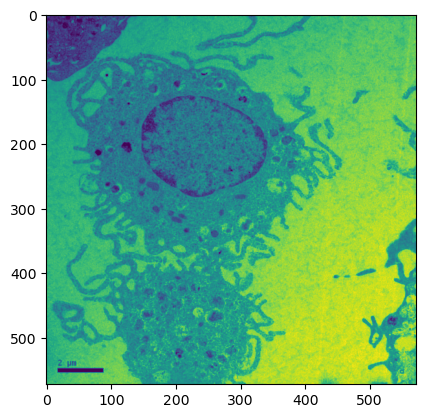

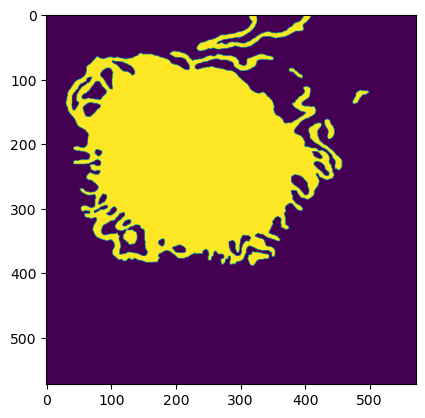

torch.Size([1, 572, 572])


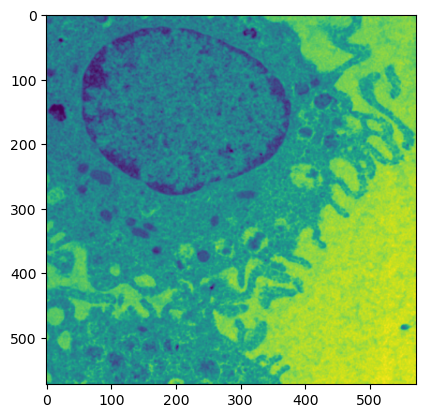

tensor([[0.0039, 0.0039, 0.0039,  ..., 0.0000, 0.0000, 0.0000],
        [0.0039, 0.0039, 0.0039,  ..., 0.0000, 0.0000, 0.0000],
        [0.0039, 0.0039, 0.0039,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]])


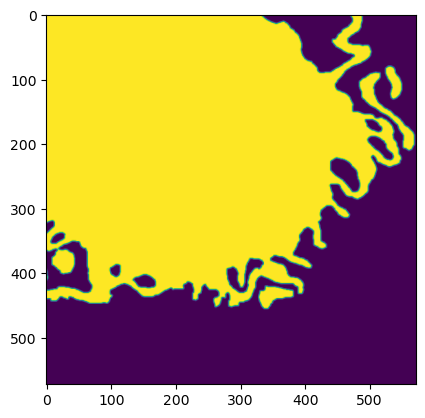

torch.Size([1, 572, 572])
torch.Size([1, 572, 572])


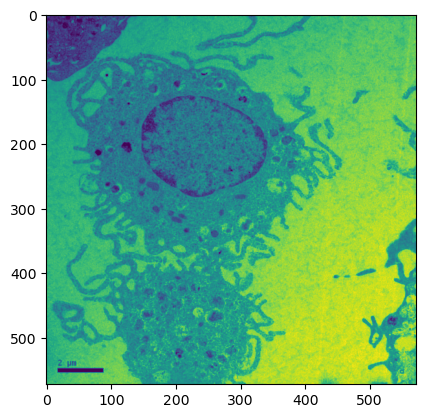

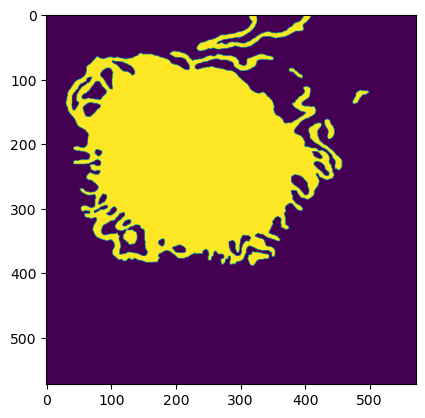

torch.Size([1, 572, 572])


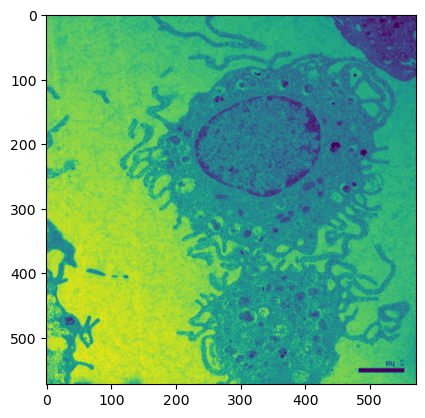

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


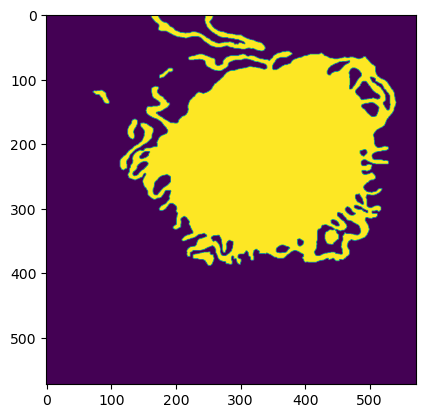

torch.Size([1, 572, 572])
torch.Size([1, 572, 572])


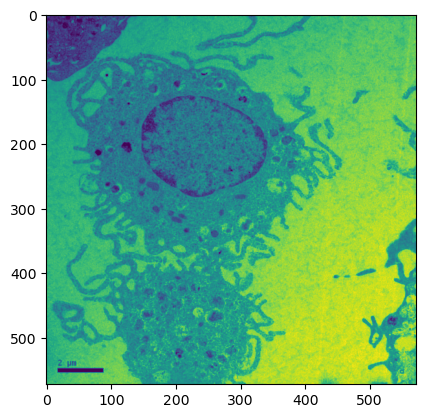

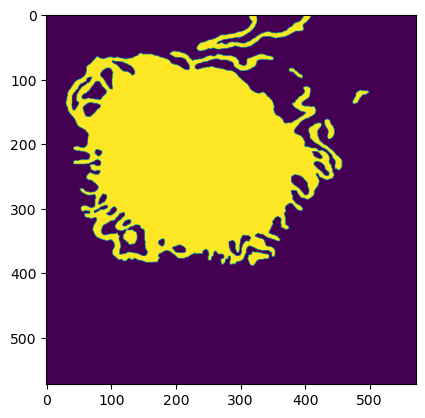

torch.Size([1, 572, 572])


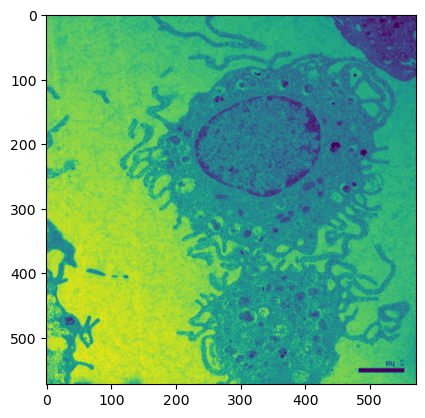

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


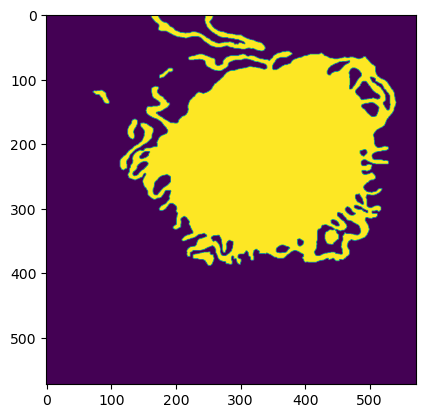

tensor([5.0757e-04, 3.4488e-03, 3.9216e-03,  ..., 4.3767e-06, 4.3767e-06,
        3.1711e-06])

In [7]:
debug_1 = 1
_,label = next(iter(testset))
_,label = next(iter(testset))
_,label = next(iter(testset))
label[label>0]

In [3]:
debug_1 = 0
if debug_1:
    dataloader = Cell_data(data_dir = './data/cells', size=572, train='True', train_test_split = 0.8, augment_data = True)
    print(dataloader[0])

### Define the Model
1. Define the Convolution blocks
2. Define the down path
3. Define the up path
4. combine the down and up path to get the final model

In [8]:
class twoConvBlock(nn.Module):
  def __init__(self, input_channels, output_channels):
    super(twoConvBlock, self).__init__()
    self.double_conv = nn.Sequential(
            nn.Conv2d(input_channels, output_channels, kernel_size=3, bias=False),
            nn.ReLU(inplace=True),
            nn.Conv2d(output_channels, output_channels, kernel_size=3, bias=False),
            nn.BatchNorm2d(output_channels),
            nn.ReLU(inplace=True)
        )

  def forward(self, input_image):
    return self.double_conv(input_image)
    

class downStep(nn.Module):
  def __init__(self):
    super(downStep, self).__init__()
    self.max_pool_layer = nn.MaxPool2d((2, 2), stride=(2, 2))

  def forward(self, input_feature_maps):
    return self.max_pool_layer(input_feature_maps)

class upStep(nn.Module):
  def __init__(self, input_channels, output_channels):
    super(upStep, self).__init__()
    self.up_sampling_layer = nn.ConvTranspose2d(input_channels, output_channels, kernel_size=2, stride=2)
    self.conv = twoConvBlock(input_channels, output_channels)
        
  def forward(self, down_input, left_input):
    up_sampled = self.up_sampling_layer(down_input)

    larger_width = left_input.size()[-1]
    larger_height = left_input.size()[-2]
    smaller_width = up_sampled.size()[-1]
    smaller_height = up_sampled.size()[-2]
    diff_width = larger_width - smaller_width
    diff_height = larger_height - smaller_height
    left_diff = diff_width // 2
    top_diff = diff_height // 2
    
    # should not use padding, should crop..
    # pad_up_sampled = F.pad(up_sampled, [diff_w // 2, diff_w - diff_w // 2, diff_h // 2, diff_h - diff_h // 2])
    left_input = left_input[..., top_diff: top_diff + smaller_height, left_diff: left_diff + smaller_width]

    mixed = torch.cat([left_input, up_sampled], dim=1)
    return mixed
    
class UNet(nn.Module):
  def __init__(self):
    super(UNet, self).__init__()
    self.conv1 = twoConvBlock(1,64)
    self.conv2 = twoConvBlock(64, 128)
    self.conv3 = twoConvBlock(128, 256)
    self.conv4 = twoConvBlock(256, 512)
    self.conv5 = twoConvBlock(512, 1024)
    
    self.conv6 = twoConvBlock(1024, 512)
    self.conv7 = twoConvBlock(512, 256)
    self.conv8 = twoConvBlock(256, 128)
    self.conv9 = twoConvBlock(128, 64)
    
    self.conv10 = nn.Conv2d(in_channels=64, out_channels=2, kernel_size=1, stride=1)

    self.down_step = downStep()

    self.upstep1 = upStep(1024, 512)
    self.upstep2 = upStep(512, 256)
    self.upstep3 = upStep(256, 128)
    self.upstep4 = upStep(128, 64)
    
  def forward(self, input_img):
    conv1_result = self.conv1(input_img)
    # print(f"conv1_result shape: {conv1_result.shape}")
      
    downsampled = self.down_step(conv1_result)
    conv2_result = self.conv2(downsampled)
    # print(f"conv2_result shape: {conv2_result.shape}")
      
    downsampled = self.down_step(conv2_result)
    conv3_result = self.conv3(downsampled)
    # print(f"conv3_result shape: {conv3_result.shape}")
    
    downsampled = self.down_step(conv3_result)
    conv4_result = self.conv4(downsampled)
    # print(f"conv4_result shape: {conv3_result.shape}")
    
    downsampled = self.down_step(conv4_result)
    down_input1 = self.conv5(downsampled)
    # print(f"down_input1 shape: {down_input1.shape}")
    
    mixed = self.upstep1(down_input1, conv4_result)
    down_input2 = self.conv6(mixed)
    # print(f"down_input2 shape: {down_input2.shape}")
    
    mixed = self.upstep2(down_input2, conv3_result)
    down_input3 = self.conv7(mixed)
    # print(f"down_input3 shape: {down_input3.shape}")
      
    mixed = self.upstep3(down_input3, conv2_result)
    down_input4 = self.conv8(mixed)
    # print(f"down_input4 shape: {down_input4.shape}")
          
    mixed = self.upstep4(down_input4, conv1_result)
    # print(f"mixed shape: {mixed.shape}")
    
    out = self.conv9(mixed)
    # print(f"out shape: {out.shape}")
      
    out = self.conv10(out)
    # print(f"out shape: {out.shape}")

    larger_width = input_img.size()[-1]
    larger_height = input_img.size()[-2]
    smaller_width = out.size()[-1]
    smaller_height = out.size()[-2]
    diff_width = larger_width - smaller_width
    diff_height = larger_height - smaller_height
      
    out = F.pad(out, [diff_width // 2, diff_width - diff_width // 2, diff_height // 2, diff_height - diff_height // 2])
    print(f"out shape: {out.shape}")
    return out

### Training

In [5]:
#root directory of project
root_dir = os.getcwd()

data_dir = os.path.join(root_dir, 'data/cells')
image_size = 572

trainset = Cell_data(data_dir = data_dir, size = image_size)
trainloader = DataLoader(trainset, batch_size = 4, shuffle=True)

testset = Cell_data(data_dir = data_dir, size = image_size, train = False)
testloader = DataLoader(testset, batch_size = 4)

In [6]:
#Traning Paramteres

#learning rate
lr = 1e-2

#number of training epochs
epoch_n = 20

#training batch size
batch_size = 4

#use checkpoint model for training
load = False

#use GPU for training
gpu = True

device = torch.device('cuda:0' if gpu else 'cpu')

model = UNet().to('cuda:0').to(device)

if load:
  print('loading model')
  model.load_state_dict(torch.load('checkpoint.pt'))


criterion = nn.CrossEntropyLoss()

# optimizer = optim.Adam(model.parameters(), lr=lr, momentum=0.99, weight_decay=0.0005)
optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=0.0005)

model.train()
for e in range(epoch_n):
  epoch_loss = 0
  model.train()
  for i, data in enumerate(trainloader):
    image, label = data
    print(image.shape)
    
    image = image.to(device)
    label = label.long().to(device)
    pred = model(image)

    crop_x = (label.shape[1] - pred.shape[2]) // 2
    crop_y = (label.shape[2] - pred.shape[3]) // 2

    label = label[:, crop_x: label.shape[1] - crop_x, crop_y: label.shape[2] - crop_y]
    label = label.squeeze(1) 
    # print(pred.shape)
    # print(label.shape)
    
    loss = criterion(pred, label)

    loss.backward()

    optimizer.step()
    optimizer.zero_grad()

    epoch_loss += loss.item()

    print('batch %d --- Loss: %.4f' % (i, loss.item() / batch_size))
  print('Epoch %d / %d --- Loss: %.4f' % (e + 1, epoch_n, epoch_loss / trainset.__len__()))

  torch.save(model.state_dict(), 'checkpoint.pt')

  model.eval()

  total = 0
  correct = 0
  total_loss = 0

  with torch.no_grad():
    for i, data in enumerate(testloader):
      image, label = data

      # image = image.unsqueeze(1).to(device)
      image = image.to(device)
      label = label.long().to(device)
         
      pred = model(image)
      crop_x = (label.shape[1] - pred.shape[2]) // 2
      crop_y = (label.shape[2] - pred.shape[3]) // 2

      label = label[:, crop_x: label.shape[1] - crop_x, crop_y: label.shape[2] - crop_y]
      label = label.squeeze(1) 
      
      # print("test")
      # print(pred.shape)
      # print(label.shape)
        
      loss = criterion(pred, label)
      total_loss += loss.item()

      _, pred_labels = torch.max(pred, dim = 1)

      total += label.shape[0] * label.shape[1] * label.shape[2]
      correct += (pred_labels == label).sum().item()

    print('Accuracy: %.4f ---- Loss: %.4f' % (correct / total, total_loss / testset.__len__()))

torch.Size([4, 1, 572, 572])
conv1_result shape: torch.Size([4, 64, 568, 568])
conv2_result shape: torch.Size([4, 128, 280, 280])
conv3_result shape: torch.Size([4, 256, 136, 136])
conv4_result shape: torch.Size([4, 256, 136, 136])
down_input1 shape: torch.Size([4, 1024, 28, 28])
down_input2 shape: torch.Size([4, 512, 52, 52])
down_input3 shape: torch.Size([4, 256, 100, 100])
down_input4 shape: torch.Size([4, 128, 196, 196])
mixed shape: torch.Size([4, 128, 392, 392])
out shape: torch.Size([4, 64, 388, 388])
out shape: torch.Size([4, 2, 388, 388])
out shape: torch.Size([4, 2, 572, 572])
torch.Size([4, 2, 572, 572])
torch.Size([4, 572, 572])
batch 0 --- Loss: 0.1473
torch.Size([4, 1, 572, 572])
conv1_result shape: torch.Size([4, 64, 568, 568])
conv2_result shape: torch.Size([4, 128, 280, 280])
conv3_result shape: torch.Size([4, 256, 136, 136])
conv4_result shape: torch.Size([4, 256, 136, 136])
down_input1 shape: torch.Size([4, 1024, 28, 28])
down_input2 shape: torch.Size([4, 512, 52, 52

### Testing and Visualization

In [7]:
model.eval()


output_masks = []
output_labels = []

with torch.no_grad():
  for i in range(testset.__len__()):
    image, labels = testset.__getitem__(i)
    
    input_image = image.unsqueeze(0).unsqueeze(0).to(device)
    pred = model(input_image)

    output_mask = torch.max(pred, dim = 1)[1].cpu().squeeze(0).numpy()

    crop_x = (labels.shape[0] - output_mask.shape[0]) // 2
    crop_y = (labels.shape[1] - output_mask.shape[1]) // 2
    labels = labels[crop_x: labels.shape[0] - crop_x, crop_y: labels.shape[1] - crop_y].numpy()
    
    output_masks.append(output_mask)
    output_labels.append(labels)


RuntimeError: Expected 3D (unbatched) or 4D (batched) input to conv2d, but got input of size: [1, 1, 1, 572, 572]

In [ ]:
fig, axes = plt.subplots(testset.__len__(), 2, figsize = (20, 20))

for i in range(testset.__len__()):
  axes[i, 0].imshow(output_labels[i])
  axes[i, 0].axis('off')
  axes[i, 1].imshow(output_masks[i])
  axes[i, 1].axis('off')